## Libraries

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from datetime import timedelta
from plotly.offline  import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

## Load Data Set

In [2]:
def load_csv():
    '''
    Descripción:
    Carga de múltiples archivos CSV
    Retorna:
    dict: Un diccionario donde las claves son nombres únicos para cada dataframe que se carga
    '''
    dataframes = {}
    paths = [file for file in os.listdir('data') if file.endswith('.csv')]
    for i in paths:
        name = i.split('.')[0].replace('-','_')
        try:
            df = pd.read_csv(f'data/{i}')
            dataframes[name] = df
        except Exception as e:
            print(f'Error al cargar el archivo {i}: {e}')
    return dataframes

In [3]:
dataframes = load_csv()

In [5]:
dataframes.keys()

dict_keys(['202310_divvy_tripdata', '202303_divvy_tripdata', '202305_divvy_tripdata', '202308_divvy_tripdata', '202306_divvy_tripdata', '202307_divvy_tripdata', '202304_divvy_tripdata', '202309_divvy_tripdata', '202312_divvy_tripdata', '202302_divvy_tripdata', '202301_divvy_tripdata', '202311_divvy_tripdata'])

## Explore data set
<p> Verificamos que los nombre, el tipo de información y la cantidad de campos sean las mismas en los archivos CSV </p>

In [6]:
tripdata_202310 = dataframes['202310_divvy_tripdata']
tripdata_202310.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member


In [7]:
tripdata_202310.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537113 entries, 0 to 537112
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             537113 non-null  object 
 1   rideable_type       537113 non-null  object 
 2   started_at          537113 non-null  object 
 3   ended_at            537113 non-null  object 
 4   start_station_name  452701 non-null  object 
 5   start_station_id    452701 non-null  object 
 6   end_station_name    447860 non-null  object 
 7   end_station_id      447860 non-null  object 
 8   start_lat           537113 non-null  float64
 9   start_lng           537113 non-null  float64
 10  end_lat             536521 non-null  float64
 11  end_lng             536521 non-null  float64
 12  member_casual       537113 non-null  object 
dtypes: float64(4), object(9)
memory usage: 53.3+ MB


In [8]:
tripdata_202312 = dataframes['202312_divvy_tripdata']
tripdata_202312.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C9BD54F578F57246,electric_bike,2023-12-02 18:44:01,2023-12-02 18:47:51,NaN,NaN,NaN,NaN,41.92,-87.66,41.92,-87.66,member
1,CDBD92F067FA620E,electric_bike,2023-12-02 18:48:19,2023-12-02 18:54:48,NaN,NaN,NaN,NaN,41.92,-87.66,41.89,-87.64,member
2,ABC0858E52CBFC84,electric_bike,2023-12-24 01:56:32,2023-12-24 02:04:09,NaN,NaN,NaN,NaN,41.89,-87.62,41.90,-87.64,member
3,F44B6F0E8F76DC90,electric_bike,2023-12-24 10:58:12,2023-12-24 11:03:04,NaN,NaN,NaN,NaN,41.95,-87.65,41.94,-87.65,member
4,3C876413281A90DF,electric_bike,2023-12-24 12:43:16,2023-12-24 12:44:57,NaN,NaN,NaN,NaN,41.92,-87.64,41.93,-87.64,member


In [9]:
tripdata_202312.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224073 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             224073 non-null  object 
 1   rideable_type       224073 non-null  object 
 2   started_at          224073 non-null  object 
 3   ended_at            224073 non-null  object 
 4   start_station_name  188363 non-null  object 
 5   start_station_id    188363 non-null  object 
 6   end_station_name    186149 non-null  object 
 7   end_station_id      186149 non-null  object 
 8   start_lat           224073 non-null  float64
 9   start_lng           224073 non-null  float64
 10  end_lat             223834 non-null  float64
 11  end_lng             223834 non-null  float64
 12  member_casual       224073 non-null  object 
dtypes: float64(4), object(9)
memory usage: 22.2+ MB


## Processing

In [10]:
tripdata = pd.concat(dataframes.values(), ignore_index=True)
tripdata

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,30B44BD4C16E688C,classic_bike,2023-11-24 08:39:27,2023-11-24 08:47:03,Clark St & Wellington Ave,TA1307000136,Southport Ave & Wellington Ave,TA1307000006,41.936497,-87.647539,41.935775,-87.663600,member
5719873,094A79892812BAB9,classic_bike,2023-11-06 09:07:20,2023-11-06 09:10:00,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,-87.654787,41.877642,-87.649618,member
5719874,F0A7DF8A44FDA3CB,electric_bike,2023-11-10 19:35:30,2023-11-10 19:44:28,Halsted St & Roscoe St,TA1309000025,Southport Ave & Wellington Ave,TA1307000006,41.943687,-87.648855,41.935775,-87.663600,member
5719875,4D5E3685BB913A3C,classic_bike,2023-11-27 09:11:23,2023-11-27 09:13:23,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,-87.654787,41.877642,-87.649618,member


In [11]:
tripdata.to_csv('original_tripdata.csv', index=False)

In [12]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


<p> Buscamos y evaluamos los valores nulos</p>

In [13]:
tripdata.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [14]:
tripdata.shape

(5719877, 13)

In [15]:
(tripdata.isna().sum() / 5719877) * 100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    15.310049
start_station_id      15.312357
end_station_name      16.245140
end_station_id        16.247605
start_lat              0.000000
start_lng              0.000000
end_lat                0.122205
end_lng                0.122205
member_casual          0.000000
dtype: float64

In [16]:
columns_delete = ["start_station_name", "start_station_id", "end_station_name", "end_station_id"]
tripdata = tripdata.drop(columns=columns_delete)

In [17]:
(tripdata.isna().sum() / 5719877) * 100

ride_id          0.000000
rideable_type    0.000000
started_at       0.000000
ended_at         0.000000
start_lat        0.000000
start_lng        0.000000
end_lat          0.122205
end_lng          0.122205
member_casual    0.000000
dtype: float64

In [18]:
tripdata.dropna(axis=0, inplace=True)

In [19]:
tripdata.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
member_casual    0
dtype: int64

<p>Eliminamos los valores duplicados</p>

In [20]:
tripdata[tripdata.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual


<p>Se convierte el tipo de started_at y ended_at a datetime64</p>

In [21]:
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'], format='%Y-%m-%d %H:%M:%S', dayfirst=True)
tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'], format='%Y-%m-%d %H:%M:%S', dayfirst=True)
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5712887 entries, 0 to 5719876
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 435.9+ MB


<p>Creación de las columnas hora, día y mes</p>

In [22]:
tripdata['hour'] = tripdata.started_at.apply(lambda x: x.hour)
tripdata['day_name'] = tripdata.started_at.apply(lambda x: x.day_name())
tripdata['month'] = tripdata.started_at.apply(lambda x: x.month)
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day_name,month
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,41.898203,-87.637536,41.921540,-87.653818,member,10,Sunday,10
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,41.888641,-87.644415,41.921540,-87.653818,member,17,Wednesday,10
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,41.898073,-87.637514,41.885837,-87.635500,member,7,Thursday,10
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,41.888716,-87.644448,41.885837,-87.635500,member,19,Tuesday,10
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,41.888716,-87.644448,41.885837,-87.635500,member,18,Monday,10


<p>El campo ride_length contiene la diferencia en minutos de los campos started_at y ended_at</p>

In [23]:
tripdata['ride_length'] = (tripdata['ended_at'] - tripdata['started_at'])
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day_name,month,ride_length
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,41.898203,-87.637536,41.921540,-87.653818,member,10,Sunday,10,0 days 00:12:53
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,41.888641,-87.644415,41.921540,-87.653818,member,17,Wednesday,10,0 days 00:12:09
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,41.898073,-87.637514,41.885837,-87.635500,member,7,Thursday,10,0 days 00:04:20
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,41.888716,-87.644448,41.885837,-87.635500,member,19,Tuesday,10,0 days 00:05:26
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,41.888716,-87.644448,41.885837,-87.635500,member,18,Monday,10,0 days 00:11:30


In [24]:
tripdata['ride_length'] = (tripdata['ride_length']) / timedelta(minutes=1)
tripdata['ride_length'] = tripdata['ride_length'].round(decimals= 1)
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day_name,month,ride_length
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,41.898203,-87.637536,41.921540,-87.653818,member,10,Sunday,10,12.9
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,41.888641,-87.644415,41.921540,-87.653818,member,17,Wednesday,10,12.2
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,41.898073,-87.637514,41.885837,-87.635500,member,7,Thursday,10,4.3
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,41.888716,-87.644448,41.885837,-87.635500,member,19,Tuesday,10,5.4
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,41.888716,-87.644448,41.885837,-87.635500,member,18,Monday,10,11.5


<p>Crear el campo distancia con el calculo del recorrido en kms</p>

In [25]:
tripdata['lat'] = (tripdata['end_lat'] - tripdata['start_lat'])
tripdata['lng'] = (tripdata['end_lng'] - tripdata['start_lng'])

In [26]:
tripdata['distance'] = np.sqrt((tripdata['lat']**2) + tripdata['lng']**2)
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day_name,month,ride_length,lat,lng,distance
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,41.898203,-87.637536,41.921540,-87.653818,member,10,Sunday,10,12.9,0.023337,-0.016282,0.028456
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,41.888641,-87.644415,41.921540,-87.653818,member,17,Wednesday,10,12.2,0.032899,-0.009403,0.034216
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,41.898073,-87.637514,41.885837,-87.635500,member,7,Thursday,10,4.3,-0.012236,0.002014,0.012400
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,41.888716,-87.644448,41.885837,-87.635500,member,19,Tuesday,10,5.4,-0.002879,0.008948,0.009400
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,41.888716,-87.644448,41.885837,-87.635500,member,18,Monday,10,11.5,-0.002879,0.008948,0.009400


In [27]:
tripdata['distance'] = tripdata['distance'] * 111
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day_name,month,ride_length,lat,lng,distance
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,41.898203,-87.637536,41.921540,-87.653818,member,10,Sunday,10,12.9,0.023337,-0.016282,3.158568
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,41.888641,-87.644415,41.921540,-87.653818,member,17,Wednesday,10,12.2,0.032899,-0.009403,3.798018
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,41.898073,-87.637514,41.885837,-87.635500,member,7,Thursday,10,4.3,-0.012236,0.002014,1.376453
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,41.888716,-87.644448,41.885837,-87.635500,member,19,Tuesday,10,5.4,-0.002879,0.008948,1.043358
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,41.888716,-87.644448,41.885837,-87.635500,member,18,Monday,10,11.5,-0.002879,0.008948,1.043358


In [28]:
tripdata['distance'] =  tripdata['distance'].round(decimals=2)

In [29]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day_name,month,ride_length,lat,lng,distance
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,41.898203,-87.637536,41.921540,-87.653818,member,10,Sunday,10,12.9,0.023337,-0.016282,3.16
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,41.888641,-87.644415,41.921540,-87.653818,member,17,Wednesday,10,12.2,0.032899,-0.009403,3.80
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,41.898073,-87.637514,41.885837,-87.635500,member,7,Thursday,10,4.3,-0.012236,0.002014,1.38
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,41.888716,-87.644448,41.885837,-87.635500,member,19,Tuesday,10,5.4,-0.002879,0.008948,1.04
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,41.888716,-87.644448,41.885837,-87.635500,member,18,Monday,10,11.5,-0.002879,0.008948,1.04


In [30]:
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [79]:
tripdata['month_name'] = tripdata['month'].map(month)
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day_name,month,ride_length,lat,lng,distance,month_name
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,41.898203,-87.637536,41.921540,-87.653818,member,10,Sunday,10,12.9,0.023337,-0.016282,3.16,October
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,41.888641,-87.644415,41.921540,-87.653818,member,17,Wednesday,10,12.2,0.032899,-0.009403,3.80,October
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,41.898073,-87.637514,41.885837,-87.635500,member,7,Thursday,10,4.3,-0.012236,0.002014,1.38,October
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,41.888716,-87.644448,41.885837,-87.635500,member,19,Tuesday,10,5.4,-0.002879,0.008948,1.04,October
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,41.888716,-87.644448,41.885837,-87.635500,member,18,Monday,10,11.5,-0.002879,0.008948,1.04,October


In [32]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5712887 entries, 0 to 5719876
Data columns (total 17 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
 9   hour           int64         
 10  day_name       object        
 11  month          int64         
 12  ride_length    float64       
 13  lat            float64       
 14  lng            float64       
 15  distance       float64       
 16  month_name     object        
dtypes: datetime64[ns](2), float64(8), int64(2), object(5)
memory usage: 784.5+ MB


<p>Se calculan los valores negativos o menores a 1 min, ya que es posible que se trate de un falso comienzo de viaje por parte del usuario ride_length</p>

In [33]:
tripdata[tripdata['ride_length'] < 0].count()

ride_id          149
rideable_type    149
started_at       149
ended_at         149
start_lat        149
start_lng        149
end_lat          149
end_lng          149
member_casual    149
hour             149
day_name         149
month            149
ride_length      149
lat              149
lng              149
distance         149
month_name       149
dtype: int64

In [34]:
tripdata[tripdata['ride_length'] < 1].count()

ride_id          145211
rideable_type    145211
started_at       145211
ended_at         145211
start_lat        145211
start_lng        145211
end_lat          145211
end_lng          145211
member_casual    145211
hour             145211
day_name         145211
month            145211
ride_length      145211
lat              145211
lng              145211
distance         145211
month_name       145211
dtype: int64

In [35]:
tripdata = tripdata[tripdata['ride_length'] >= 1]
tripdata = tripdata.reset_index()
tripdata = tripdata.drop(columns=['index'])
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day_name,month,ride_length,lat,lng,distance,month_name
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,41.898203,-87.637536,41.921540,-87.653818,member,10,Sunday,10,12.9,0.023337,-0.016282,3.16,October
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,41.888641,-87.644415,41.921540,-87.653818,member,17,Wednesday,10,12.2,0.032899,-0.009403,3.80,October
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,41.898073,-87.637514,41.885837,-87.635500,member,7,Thursday,10,4.3,-0.012236,0.002014,1.38,October
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,41.888716,-87.644448,41.885837,-87.635500,member,19,Tuesday,10,5.4,-0.002879,0.008948,1.04,October
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,41.888716,-87.644448,41.885837,-87.635500,member,18,Monday,10,11.5,-0.002879,0.008948,1.04,October


In [36]:
tripdata.to_csv('tripdata.csv', index=False)

## Analysis and Visualization

In [2]:
tripdata = pd.read_csv('tripdata.csv')

In [3]:
sns.set_style('whitegrid')

In [4]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567676 entries, 0 to 5567675
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ride_id        object 
 1   rideable_type  object 
 2   started_at     object 
 3   ended_at       object 
 4   start_lat      float64
 5   start_lng      float64
 6   end_lat        float64
 7   end_lng        float64
 8   member_casual  object 
 9   hour           int64  
 10  day_name       object 
 11  month          int64  
 12  ride_length    float64
 13  lat            float64
 14  lng            float64
 15  distance       float64
 16  month_name     object 
dtypes: float64(8), int64(2), object(7)
memory usage: 722.1+ MB


<Axes: xlabel='member_casual', ylabel='ride_length'>

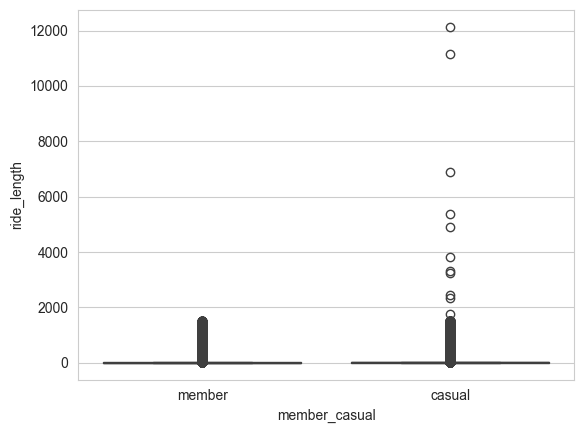

In [40]:
sns.boxplot(data = tripdata, x = 'member_casual', y = 'ride_length', order = ['member', 'casual'])

In [41]:
pd.pivot_table(tripdata,
               index = 'member_casual',
               values = 'ride_id',
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,2001466
member,3566210
Total Count,5567676


In [45]:
fig = tripdata.groupby('member_casual', as_index = False).count()

px.bar(fig, y='member_casual', x='ride_id', range_x=[0,3000000],
        color = 'member_casual',
        height = 300,
        text ='ride_id',
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
        color_discrete_map = {'casual': 'orange', 'member': 'blue'})

In [80]:
tripdata['year'] = '2023'

In [81]:
rides_for_month = pd.pivot_table(tripdata,
                                 index=['year', 'month_name', 'member_casual'],
                                 values='ride_id',
                                 aggfunc=['count'],
                                 margins=True,
                                 margins_name='Total Count')

rides_for_month = rides_for_month.loc[(rides_for_month != 0).any(axis=1)]
rides_for_month

count
                                      ride_id
year        month_name member_casual         
2023        April      casual          142255
                       member          269279
            August     casual          302894
                       member          449752
            December   casual           50454
                       member          168807
            February   casual           41757
                       member          142713
            January    casual           38760
                       member          145382
            July       casual          321729
                       member          425123
            June       casual          292512
                       member          408002
            March      casual           60179
                       member          189455
            May        casual          226973
                       member          359770
            November   casual           96077
                       member          258935
            October    casual          172624
                       member          352577
            September  casual          255252
                       member          396415
Total Count                           5567676

In [82]:
rides_for_month_fig = tripdata.groupby(['month', 'member_casual'], as_index = False).count()
rides_for_month_fig = rides_for_month_fig[rides_for_month_fig['ride_id'] != 0]
px.line(rides_for_month_fig, x='month', y='ride_id', range_y=[0,500000],
        color = 'member_casual',
        line_shape='spline',
        markers=True,
        labels={'ride_id': 'No. of Rides', 'month': 'Months (Jan 23 - Dec 23)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True},
        color_discrete_map = {'casual': 'orange', 'member': 'blue'})

In [5]:
mean_ride_length = pd.pivot_table(tripdata,
                                  index='member_casual',
                                  values=['ride_length'],
                                  aggfunc=['mean'],
                                  margins=True,
                                  margins_name='Total Ride Average')
mean_ride_length

,mean
,ride_length
member_casual,
casual,21.182765
member,12.379606
Total Ride Average,15.544162


In [5]:
count_rideable_type = pd.pivot_table(tripdata,
               index=['rideable_type', 'member_casual'],
               values=['ride_id'],
               aggfunc=['count'],
               margins=True,
               margins_name='Total Rides')
count_rideable_type

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          861314
              member         1790088
docked_bike   casual           75443
electric_bike casual         1064709
              member         1776122
Total Rides                  5567676

In [6]:
count_rideable_type_fig = tripdata.groupby(['rideable_type', 'member_casual'], as_index=False).count()

px.bar(count_rideable_type_fig, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual', 
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Ride', 'member_casual': 'Member/Casual', 'rideable_type': 'Rideable Type '},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': 'orange', 'member': 'blue'})

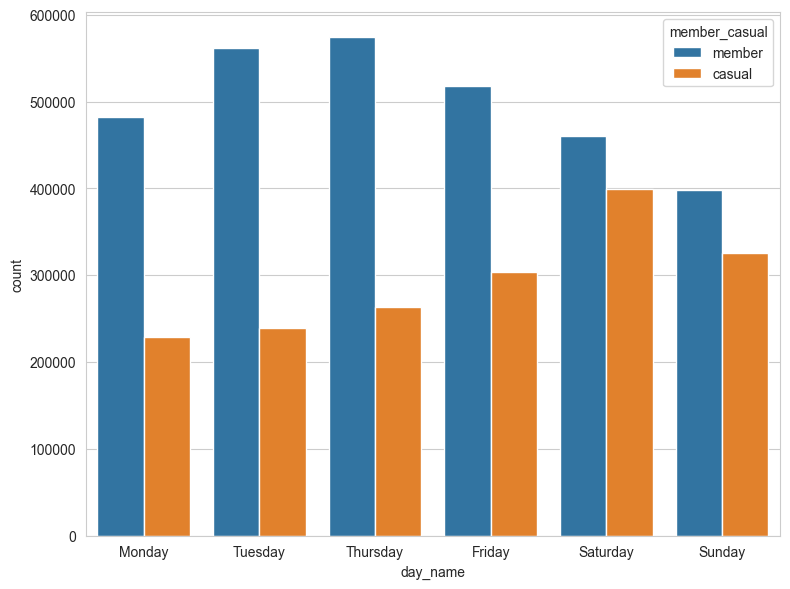

In [7]:
plt.figure(figsize=(8,6))
order = ['Monday', 'Tuesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day_name', hue='member_casual', data=tripdata, order=order)
plt.tight_layout()

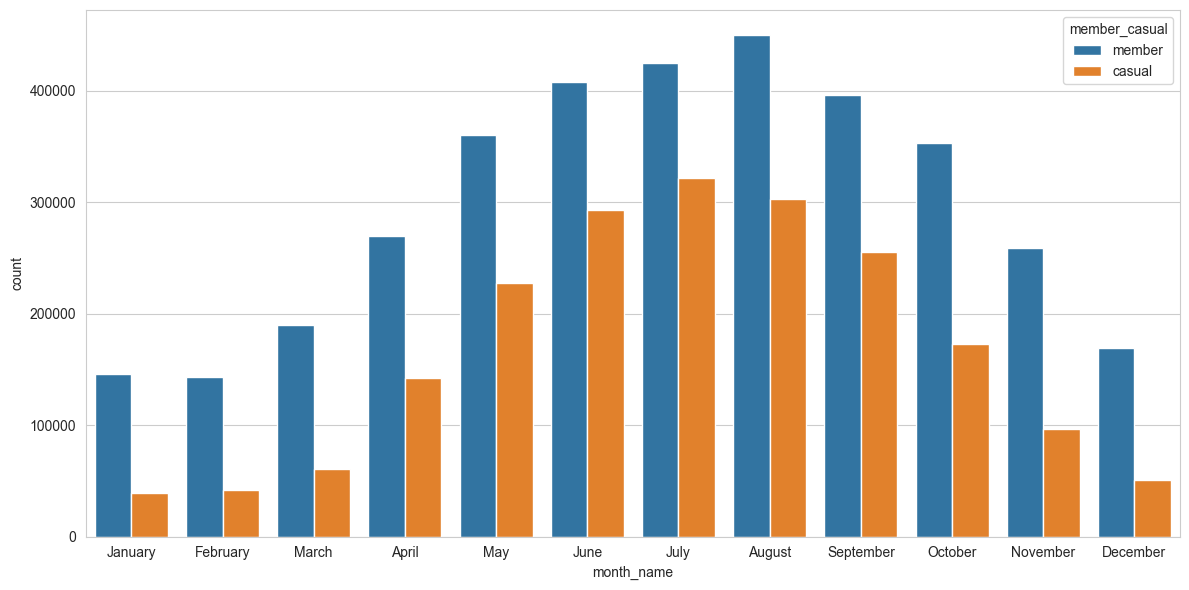

In [13]:
plt.figure(figsize=(12,6))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x='month_name', hue='member_casual', data=tripdata, order=order)
plt.tight_layout()

In [22]:
tripdata.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
member_casual    0
hour             0
day_name         0
month            0
ride_length      0
lat              0
lng              0
distance         0
month_name       0
dtype: int64

In [23]:
tripdata['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [25]:
tripdata['distance'].describe()

count    5.567676e+06
mean     2.427704e+00
std      6.781529e+00
min      0.000000e+00
25%      1.080000e+00
50%      1.820000e+00
75%      3.180000e+00
max      1.078130e+04
Name: distance, dtype: float64

Text(0, 0.5, 'Cantidad de viajes')

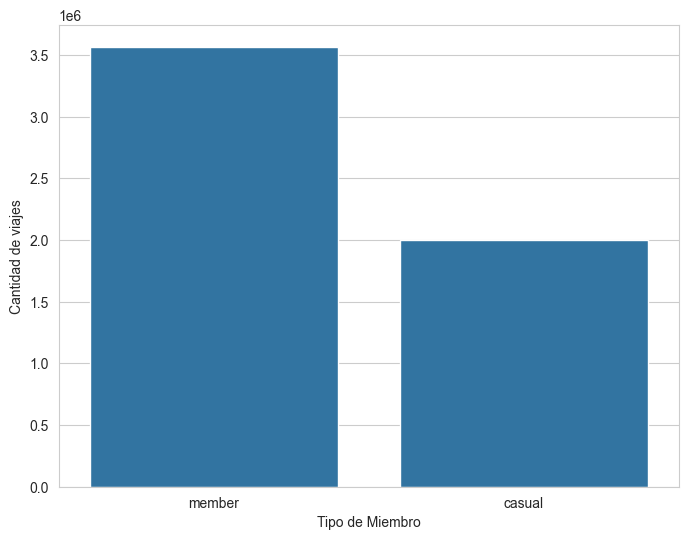

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(data=tripdata, x='member_casual', y='distance', estimator=lambda x: len(x), errorbar=None)
plt.xlabel('Tipo de Miembro')
plt.ylabel('Cantidad de viajes')

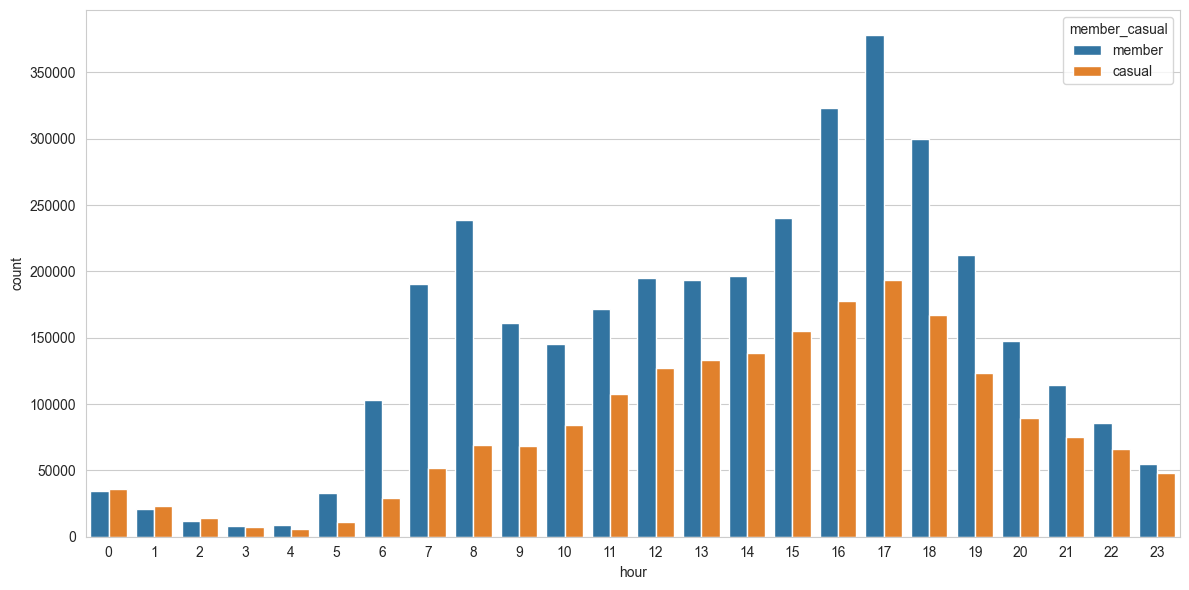

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='hour', hue='member_casual', data=tripdata)
plt.tight_layout()